## Setup

In [15]:
from src.phrase_analysis import process_directory, plot_phrase_frequency_over_time_all, plot_length_distribution, analyze_files_phrase_occurrences, get_recent_contexts_all, get_per_appearance_frequency, calculate_poisson_predictions, calculate_negative_binomial_predictions, format_prediction_table, get_phrases
from src.regex_pattern_generator import generate_regex_patterns
from datetime import datetime

In [16]:
PHRASES = get_phrases('KXNYCMAYORDEBATEMENTION-25OCT16')
SEARCH_PHRASES = generate_regex_patterns(PHRASES)

from pprint import pprint
pprint(SEARCH_PHRASES)

{'Ackman': "\\b(?:\\w+-)*(?:ackman|ackmen|ackman's|ackmans'|ackmen')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Beret': "\\b(?:\\w+-)*(?:beret|berets|beret's|berets')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Billionaire': "\\b(?:\\w+-)*(?:billionaire|billionaires|billionaire's|billionaires')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Corrupt / Corruption': "\\b(?:\\w+-)*(?:(?:corrupt|corrupts|corrupt's|corrupts'|corruption|corruptions|corruption's|corruptions'))(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Crime': "\\b(?:\\w+-)*(?:crime|crimes|crime's|crimes')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Data': "\\b(?:\\w+-)*(?:data|datas|data's|datas')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Economy': "\\b(?:\\w+-)*(?:economy|economies|economy's|economys'|economies')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Fentanyl': "\\b(?:\\w+-)*(?:fentanyl|fentanyls|fentanyl's|fentanyls')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Funding': "\\b(?:\\w+-)*(?:funding|fundings|funding's|fundings')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Gaza': "\\b(?:\\w+-)*(?:gaza|gazas|gaza's|gazas')(?:-\\

In [17]:
# Process transcripts
df = process_directory('../data-mamdani/transcripts', SEARCH_PHRASES)
df = df.sort_values('date')

df_recent = df[df['date'] > '2025-08-24']

# Print dataset statistics
print("Dataset Statistics:")

print(f"\nAll Transcripts:")
print(f"Total: {len(df)}")
print(f"Total recent: {len(df_recent)}")

print("\nWord Count Statistics:")

print(f"\nAll Transcripts:")
print(f"Average length: {df['text_length'].mean():.0f} words") 
print(f"Average recent length: {df_recent['text_length'].mean():.0f} words")


print("\nDate Ranges:")

print(f"\nAll Transcripts:")
print(f"Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"Date range recent: {df_recent['date'].min().strftime('%Y-%m-%d')} to {df_recent['date'].max().strftime('%Y-%m-%d')}")

Categories found in directory:
- transcripts
Dataset Statistics:

All Transcripts:
Total: 66
Total recent: 13

Word Count Statistics:

All Transcripts:
Average length: 781 words
Average recent length: 578 words

Date Ranges:

All Transcripts:
Date range: 2021-10-22 to 2025-09-26
Date range recent: 2025-08-28 to 2025-09-26


## Phrase Frequency Over Time

Speeches dropped off dramatically between election day and inauguration day. Non-speech transcripts mostly don't go back as far in time (need to scrape more data)


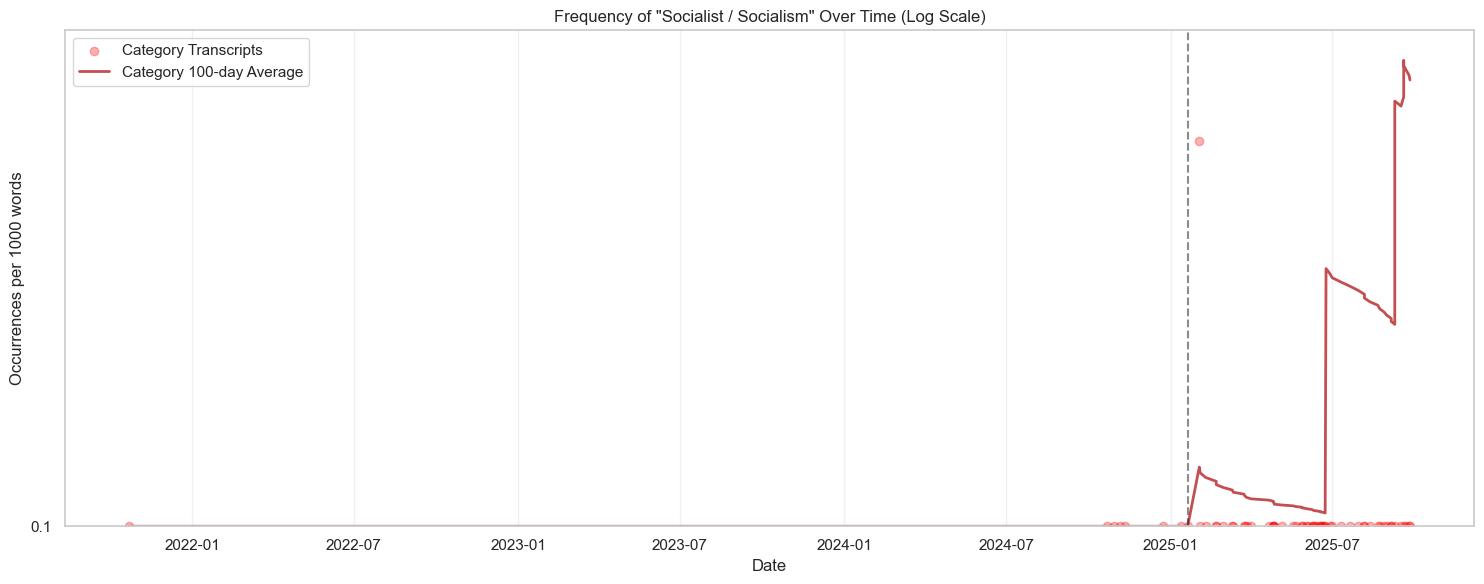


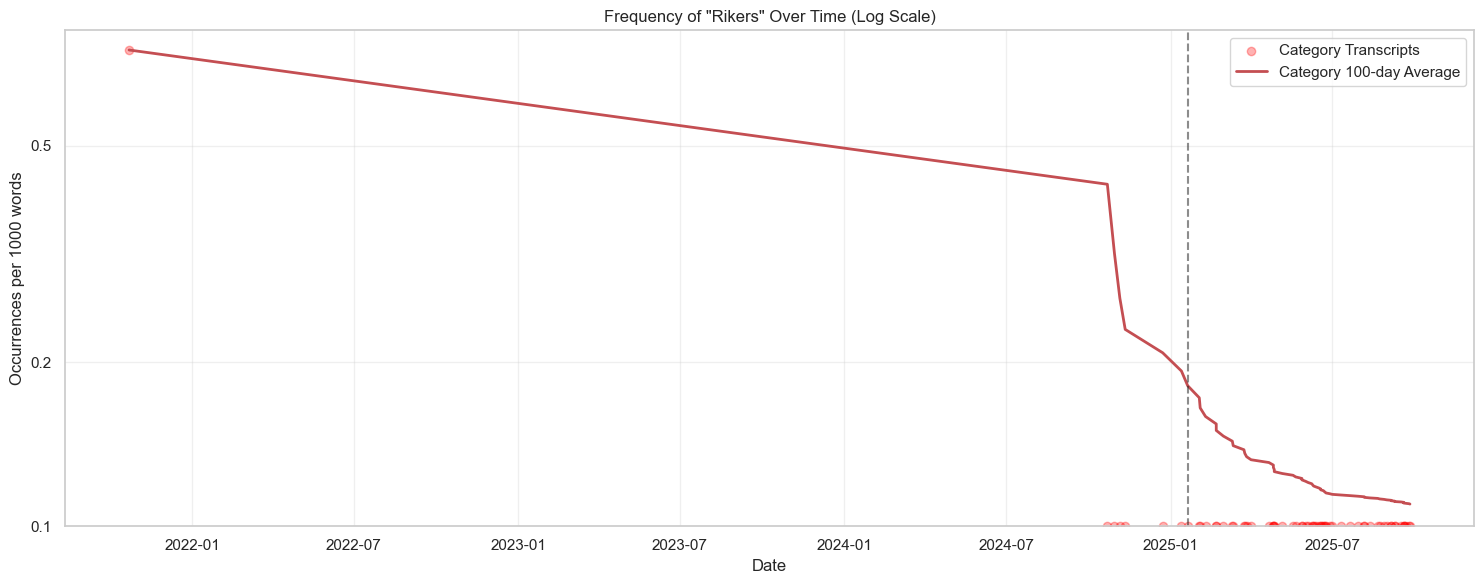

/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:231: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(np.log10(0.1), np.log10(ymax + 0.1))



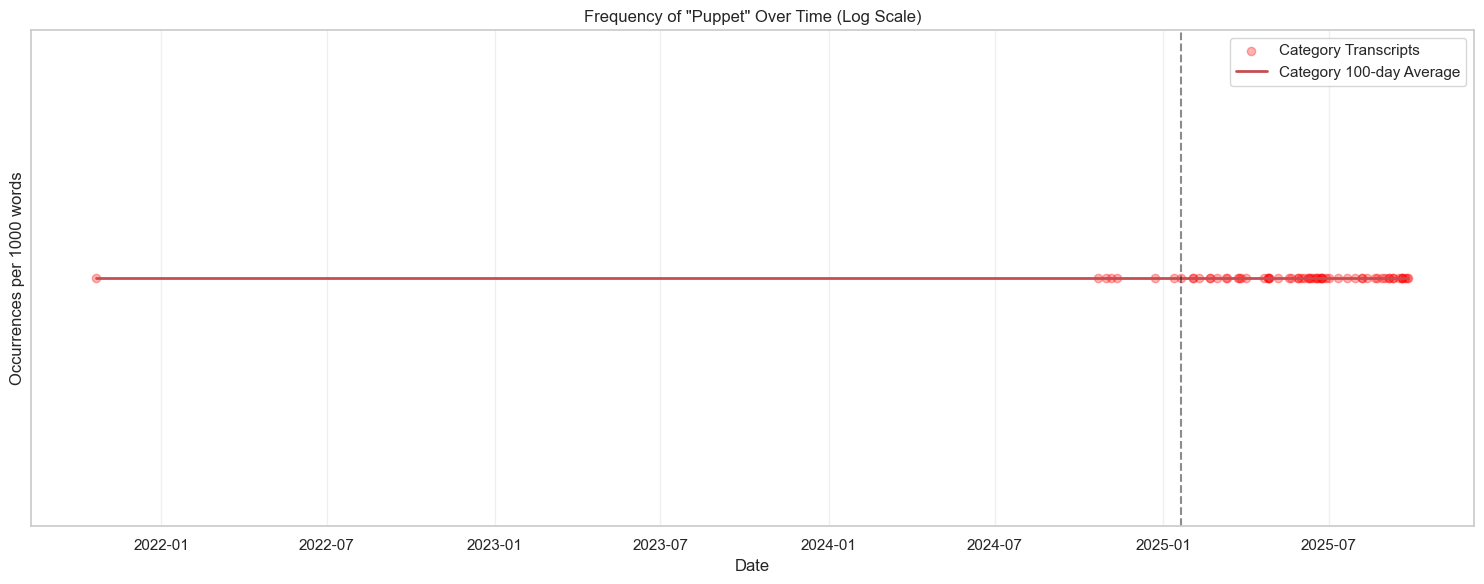

/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:231: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(np.log10(0.1), np.log10(ymax + 0.1))



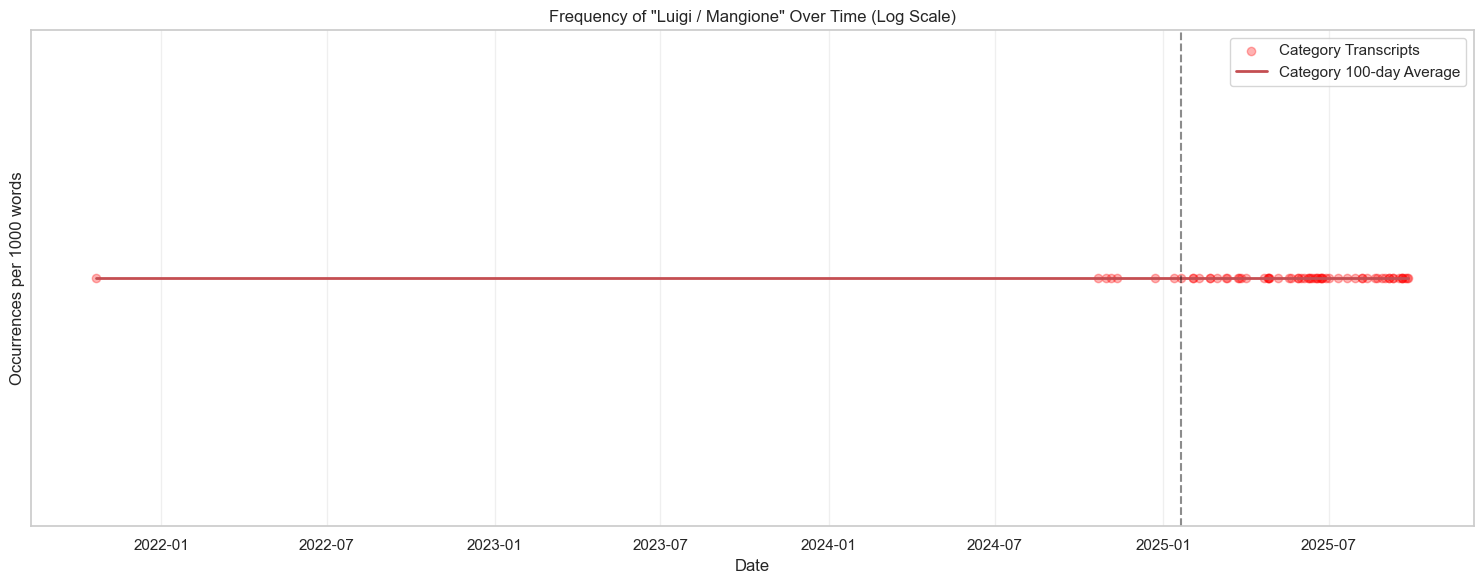


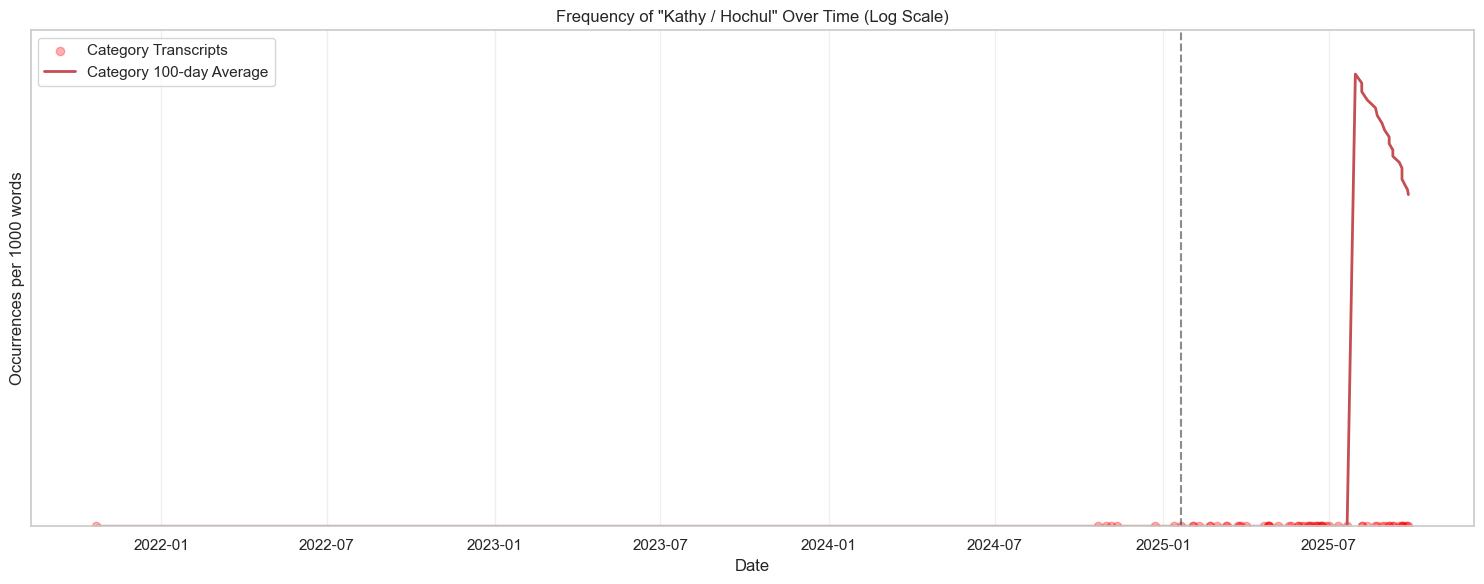

/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:231: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(np.log10(0.1), np.log10(ymax + 0.1))



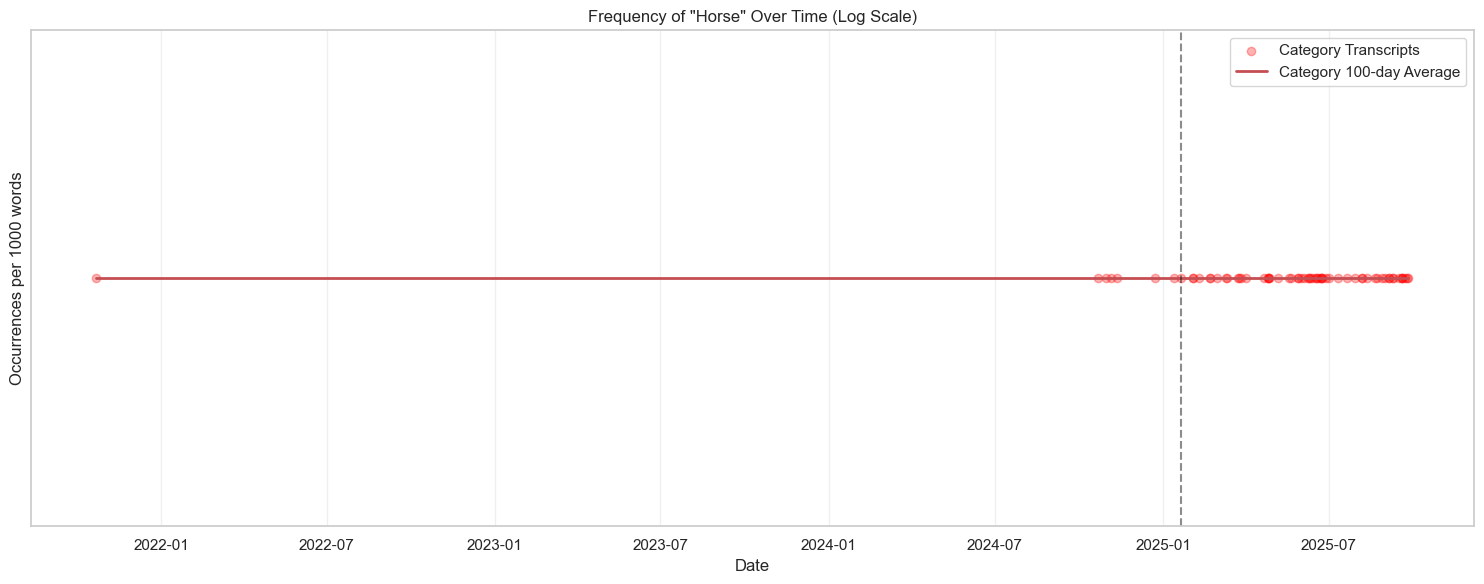


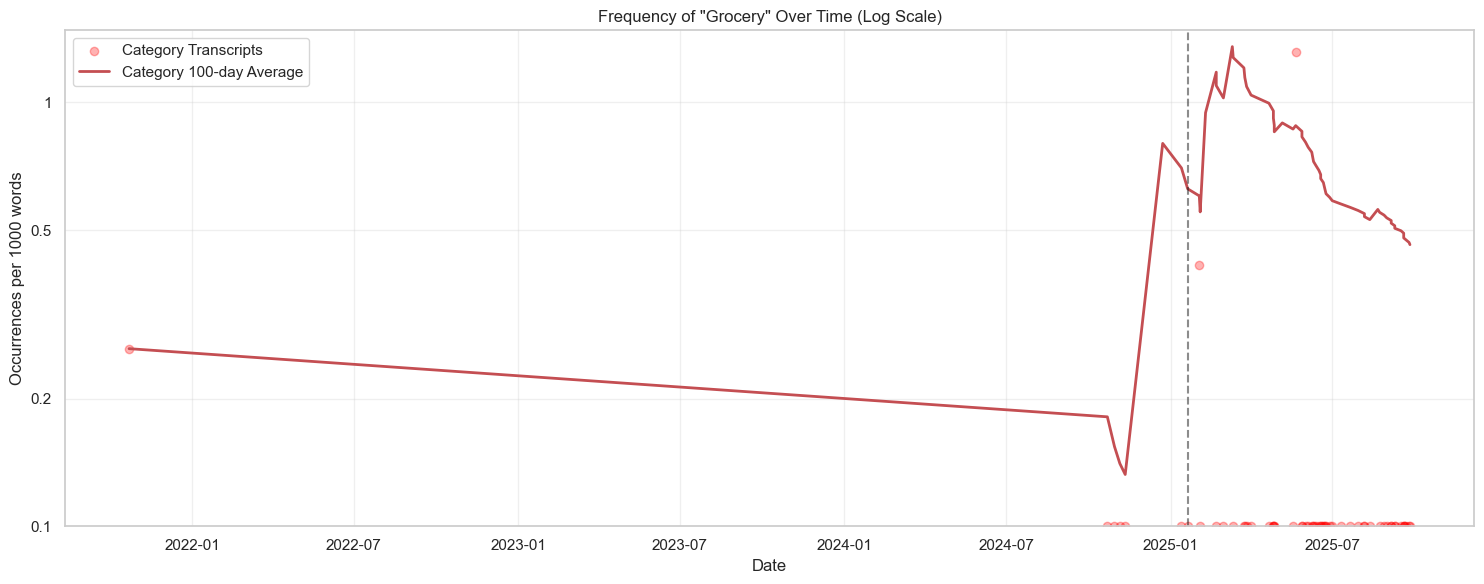

/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:231: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(np.log10(0.1), np.log10(ymax + 0.1))



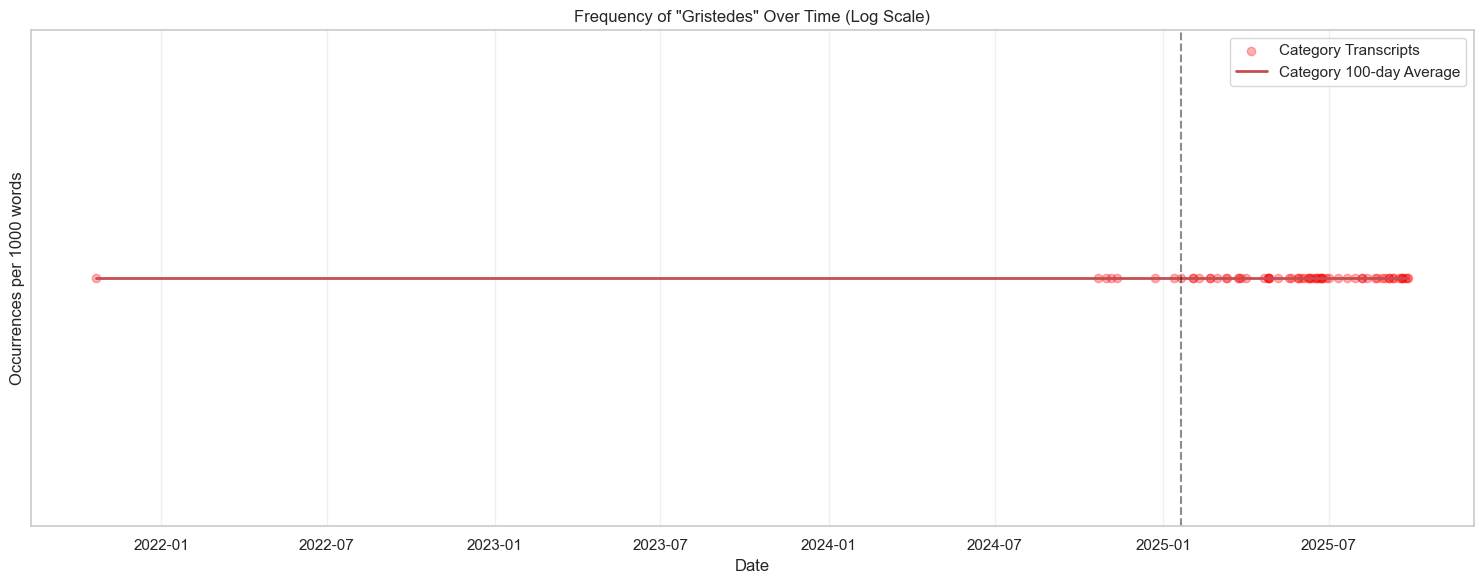


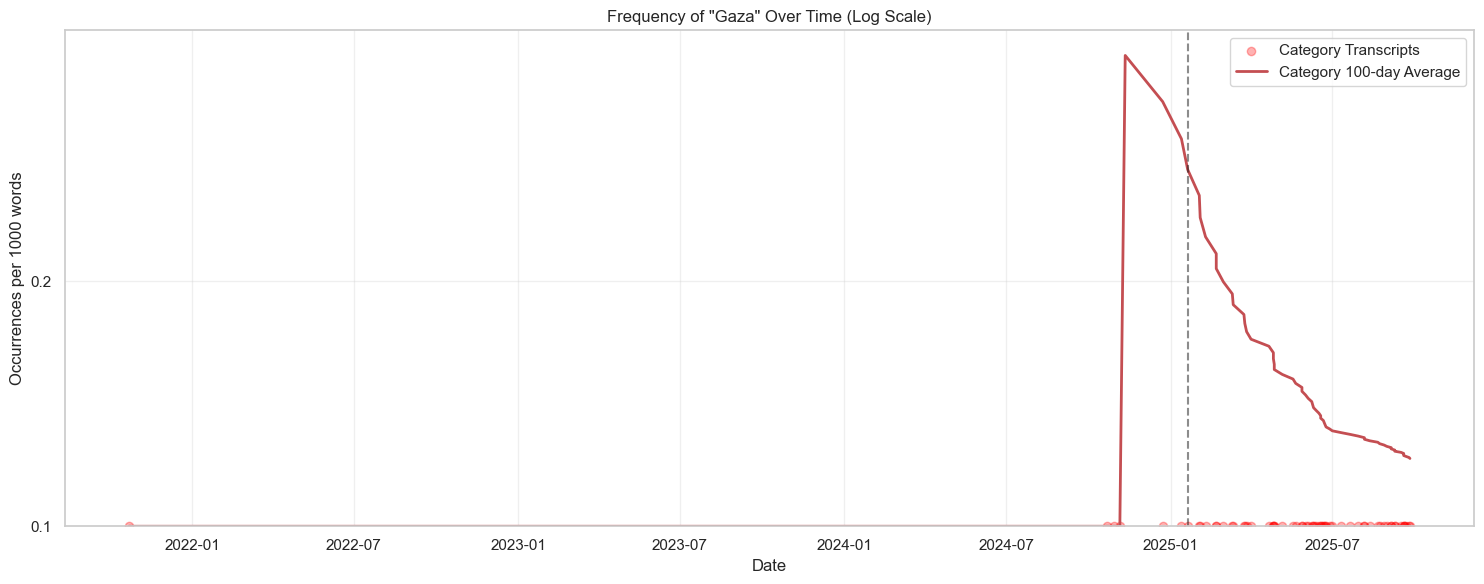


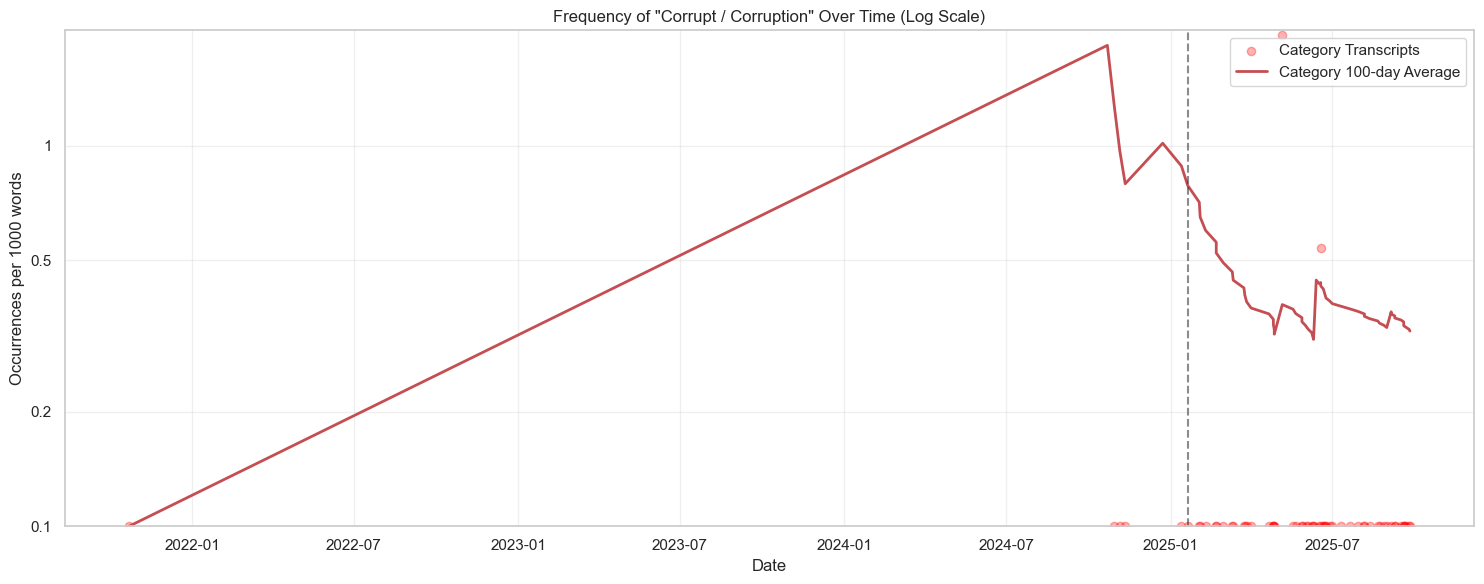

/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:231: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(np.log10(0.1), np.log10(ymax + 0.1))



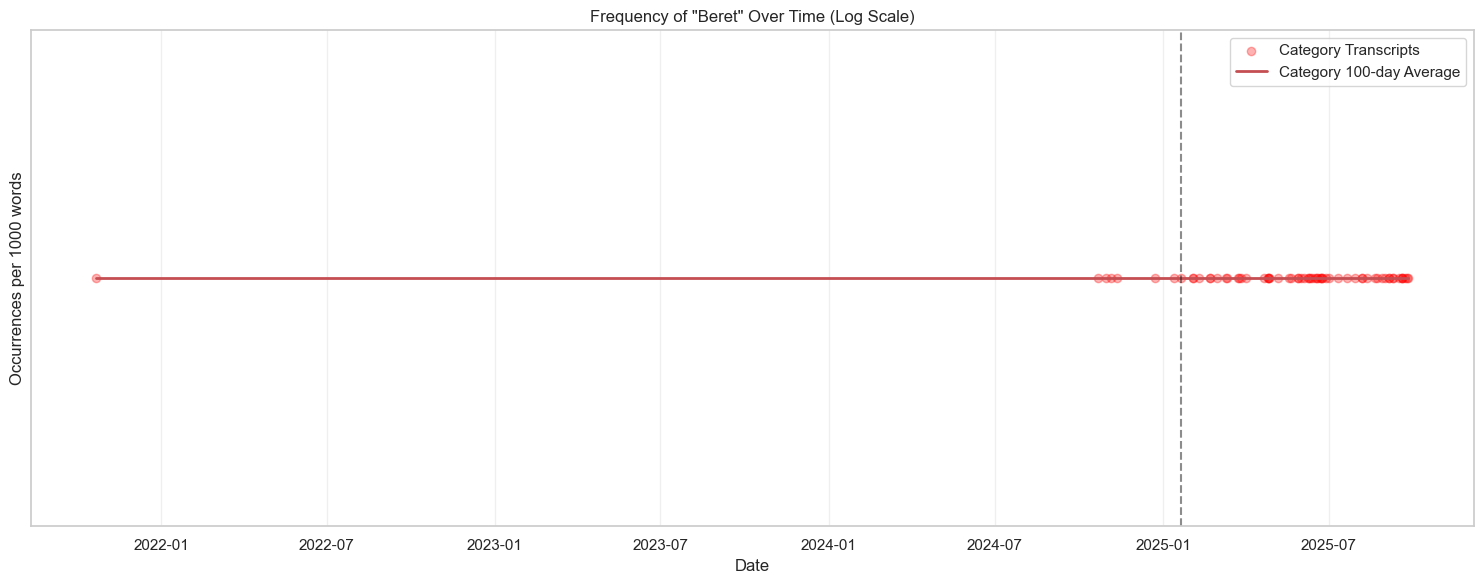


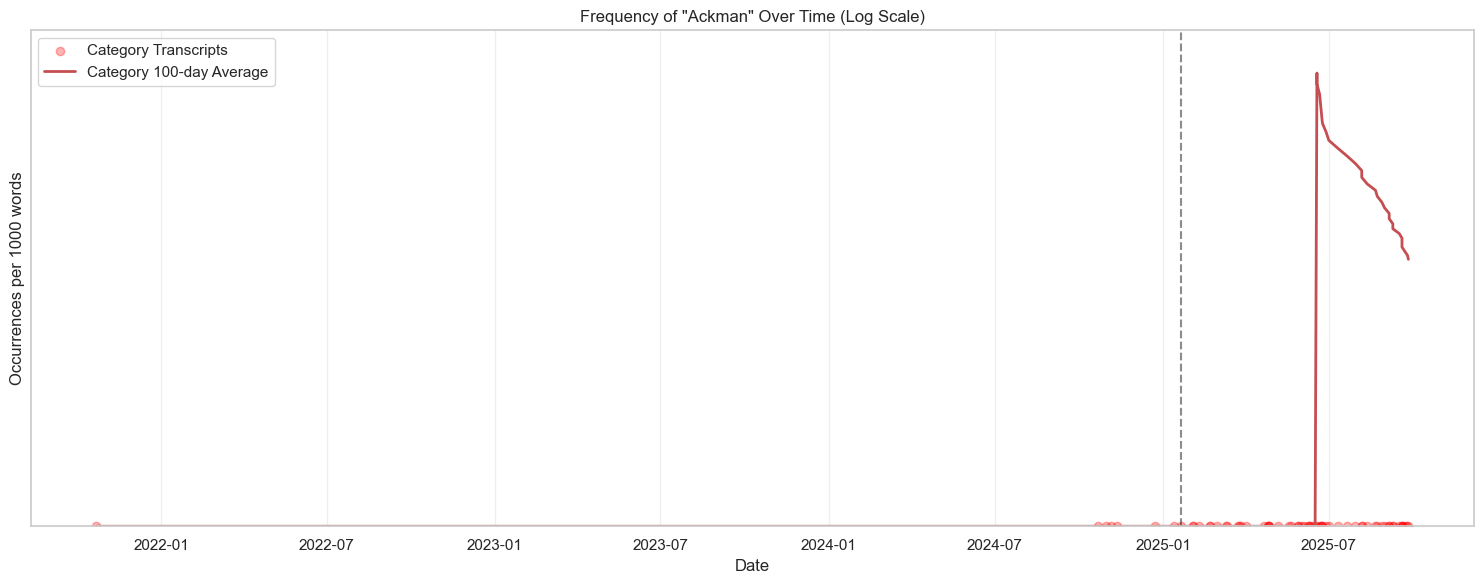

/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:231: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(np.log10(0.1), np.log10(ymax + 0.1))



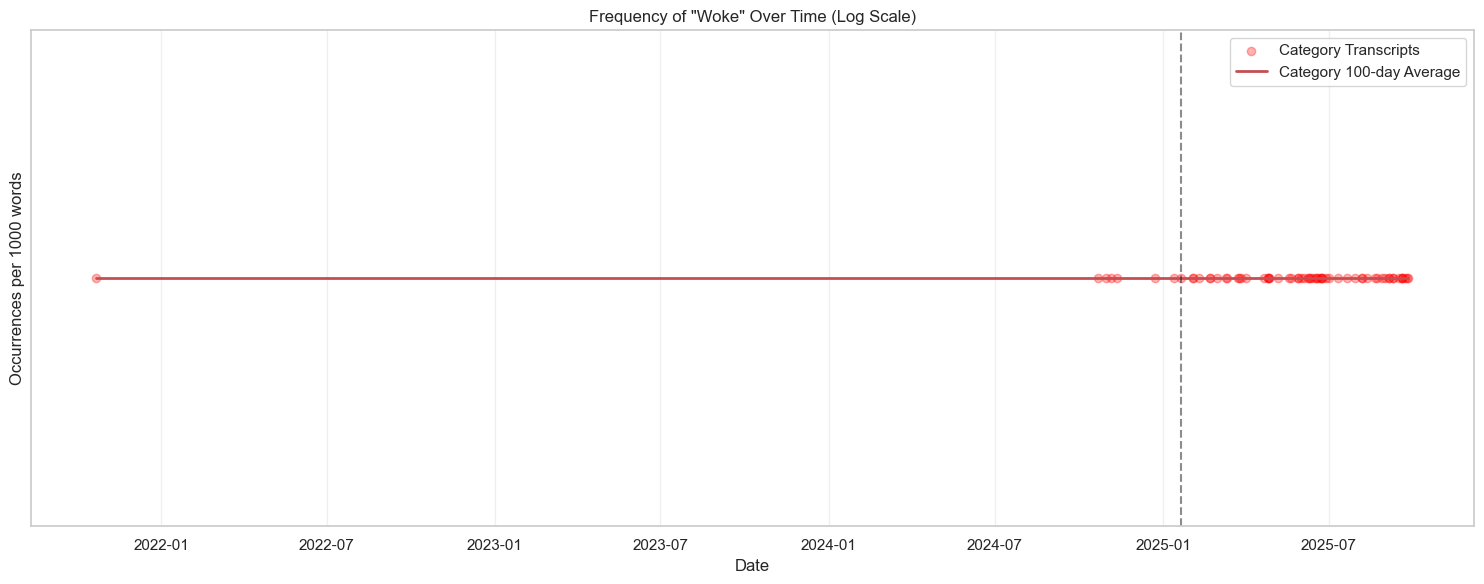


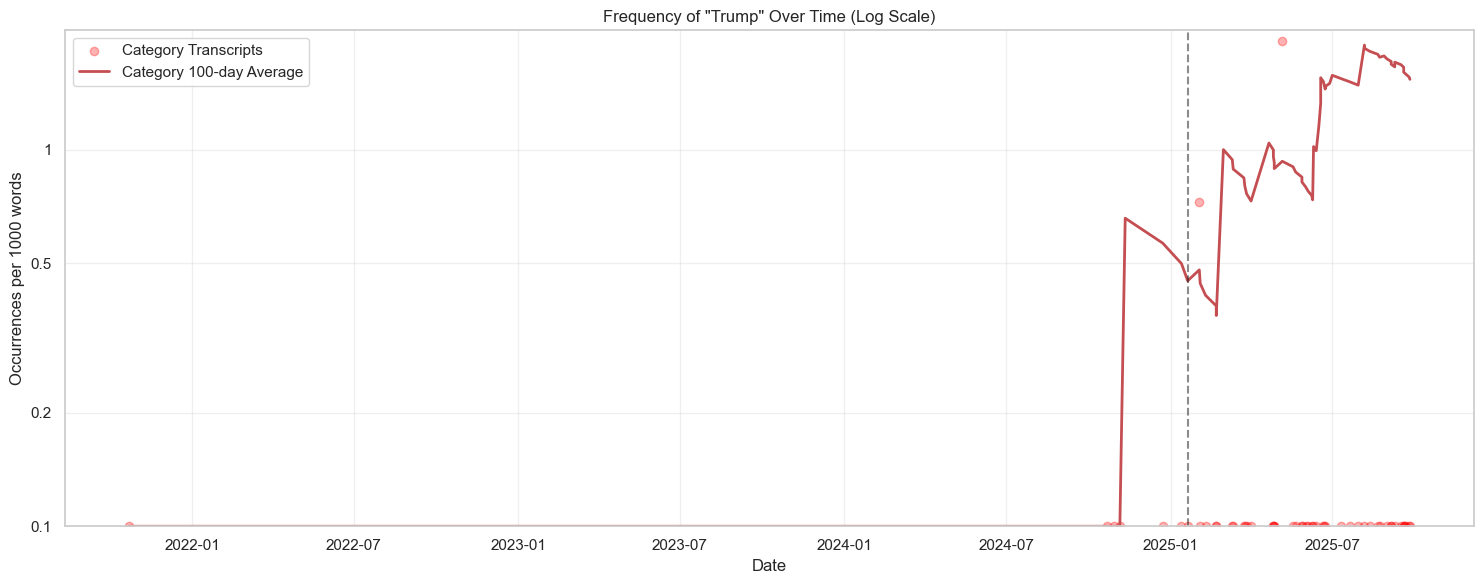


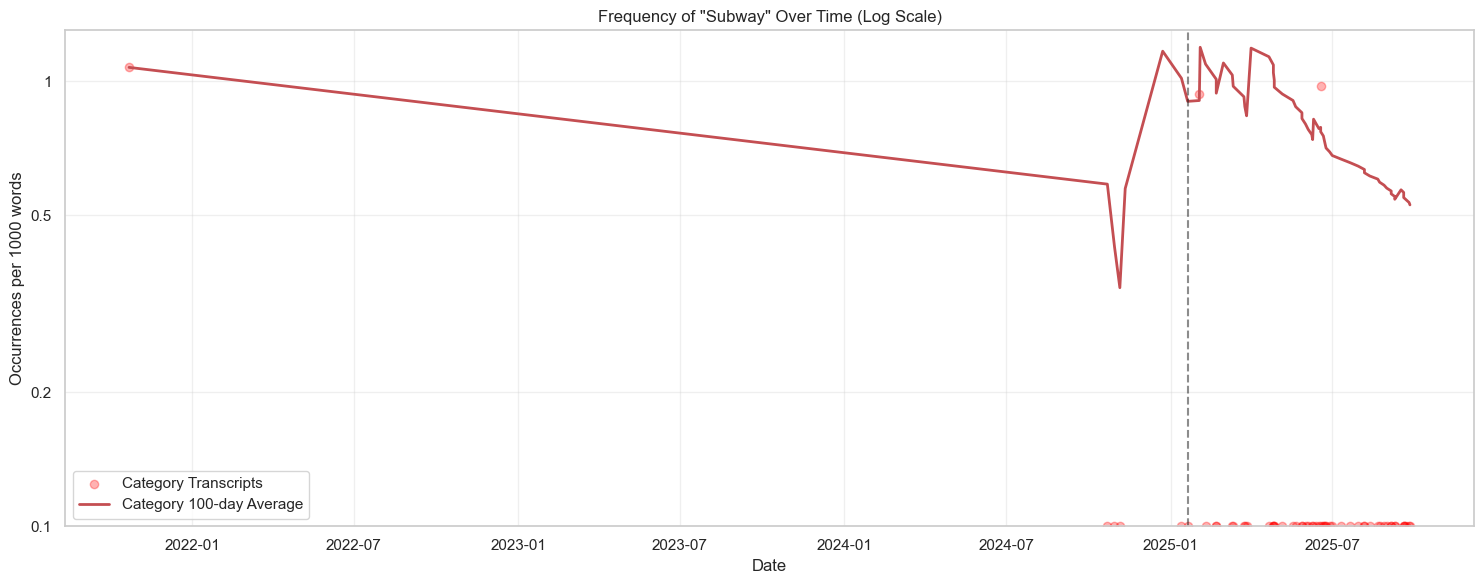


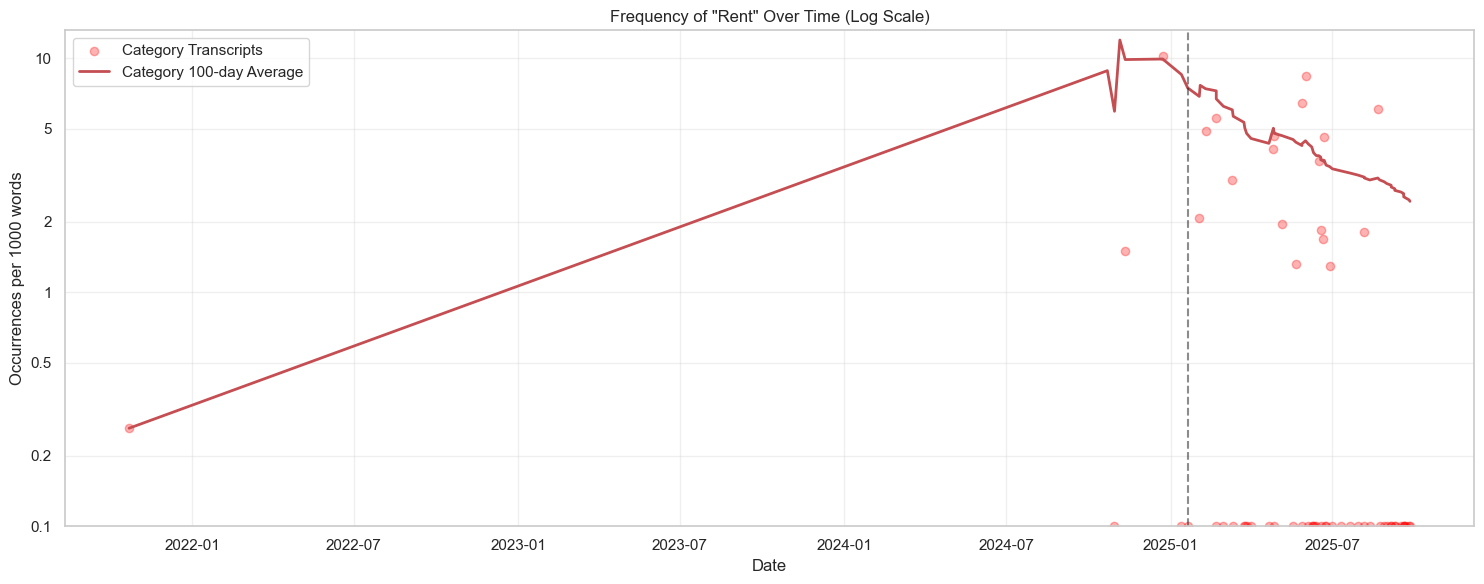


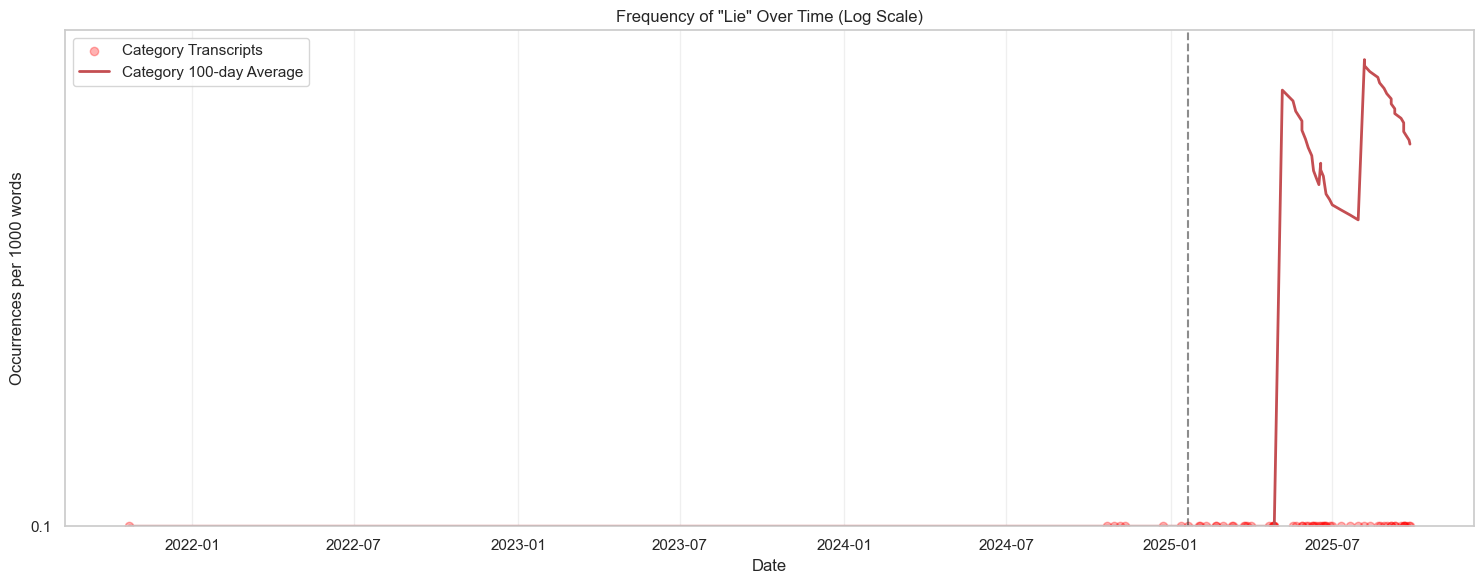


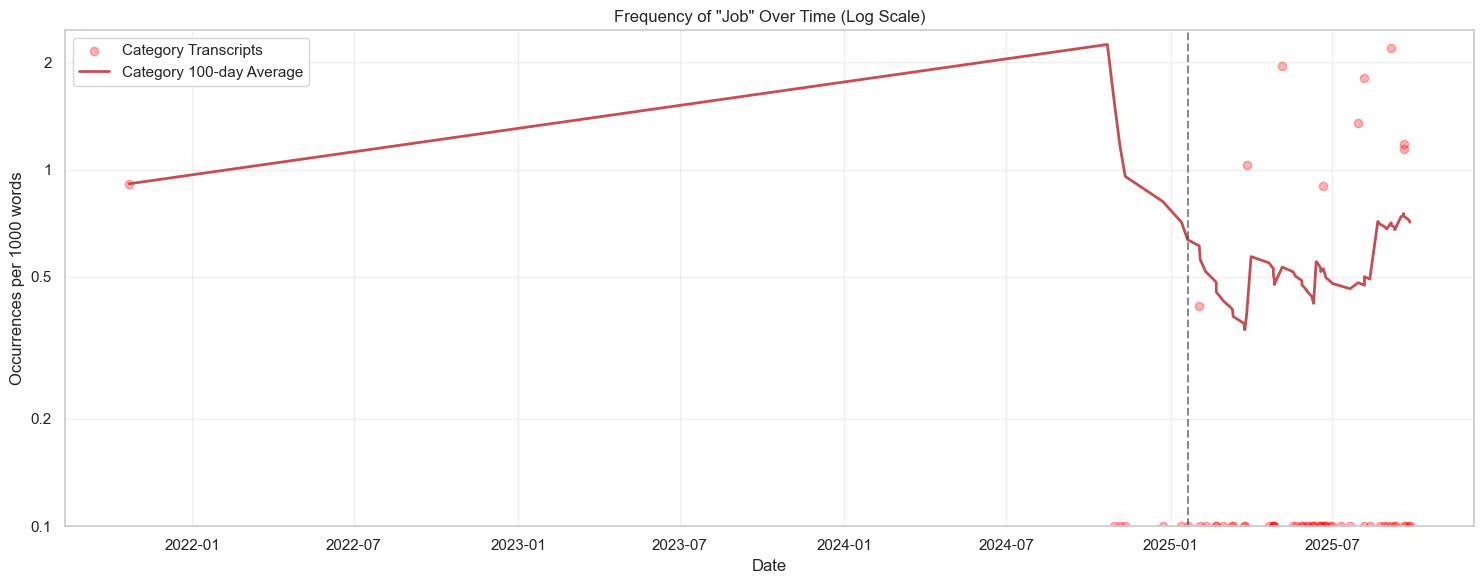


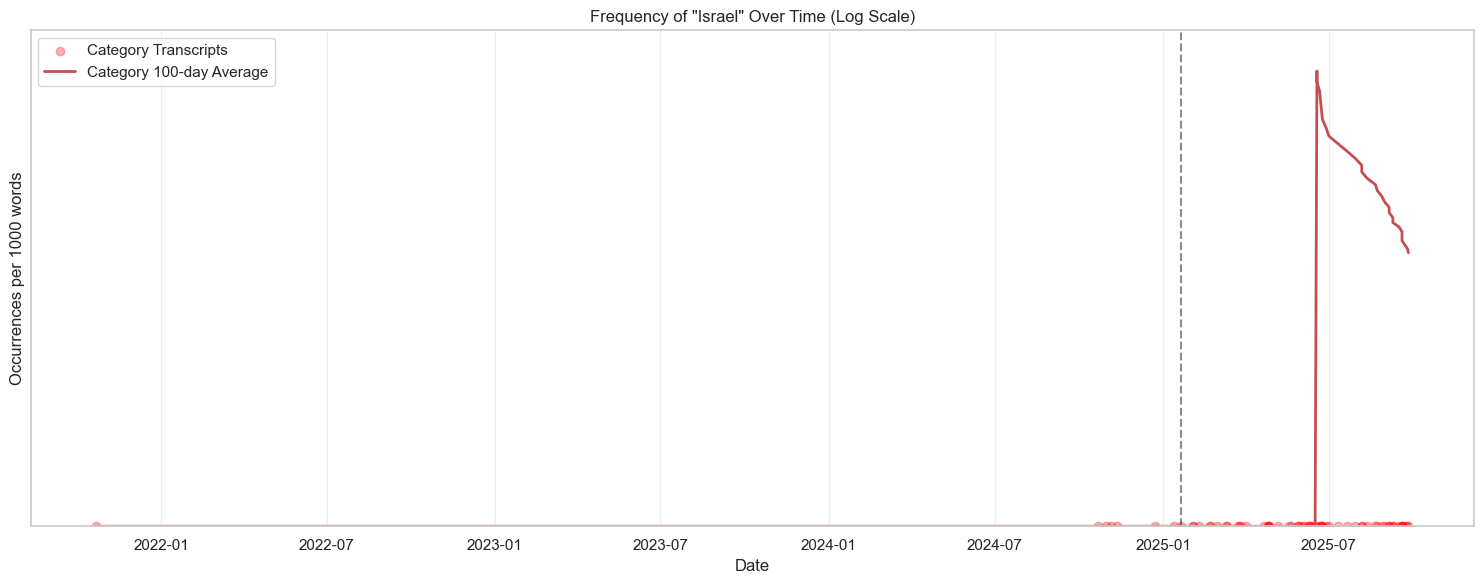


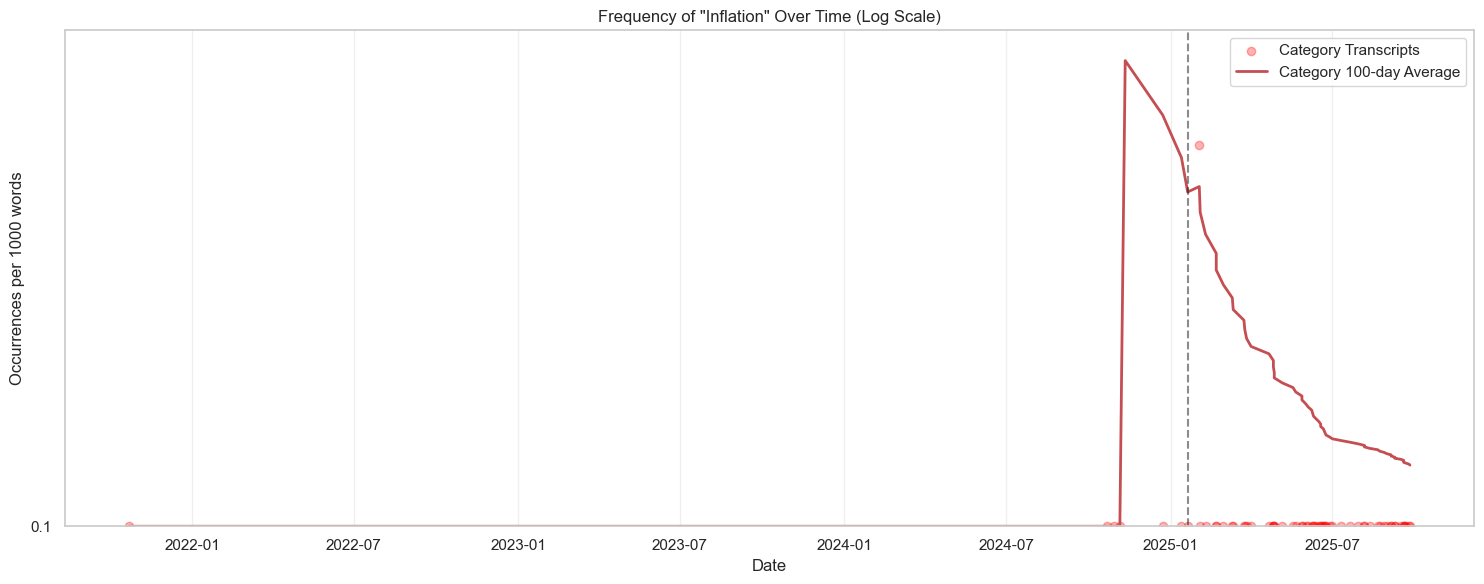


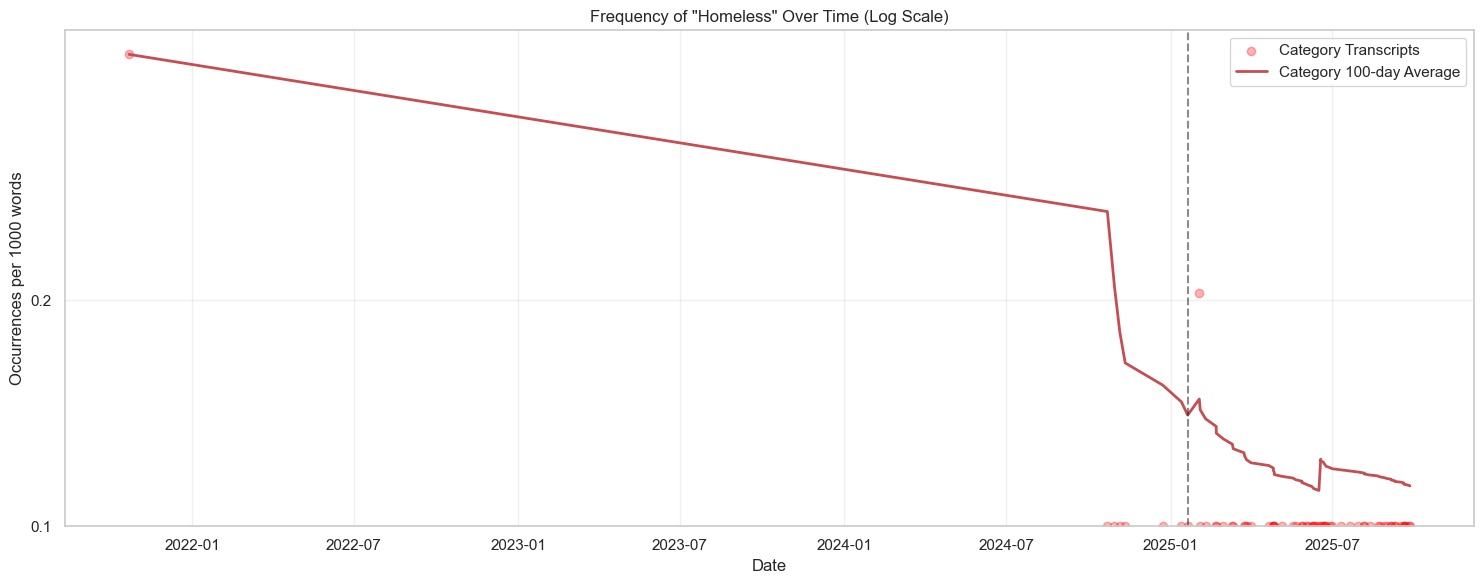


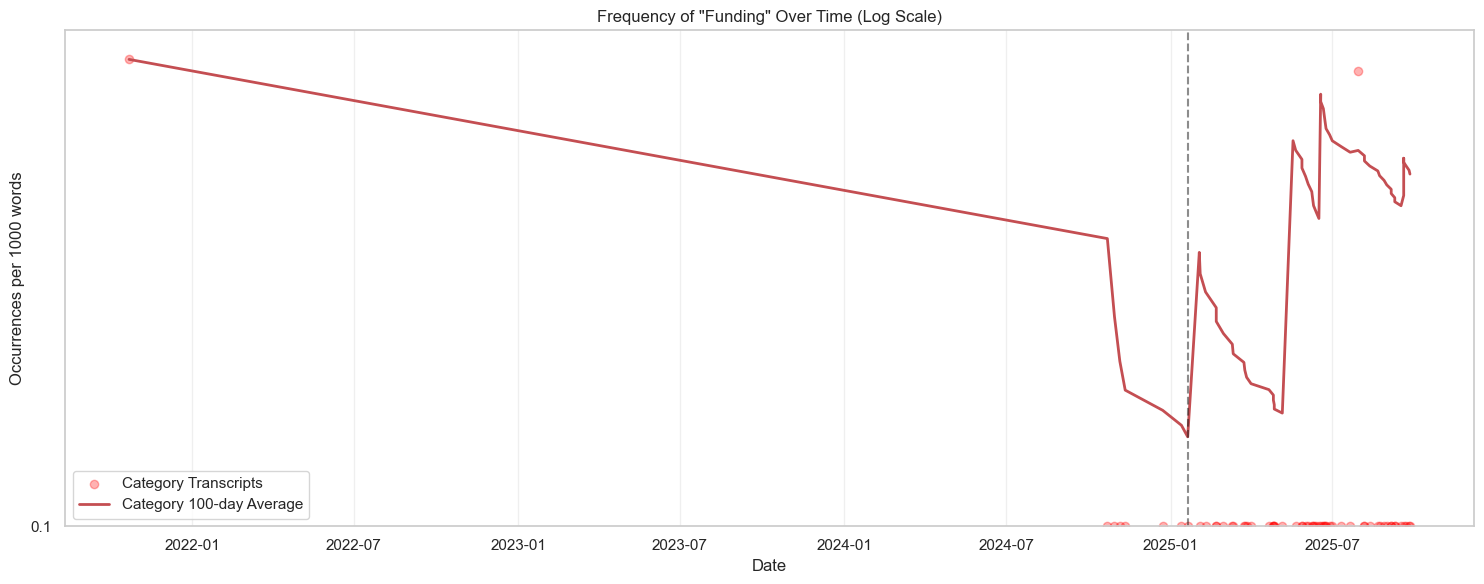

/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:231: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(np.log10(0.1), np.log10(ymax + 0.1))



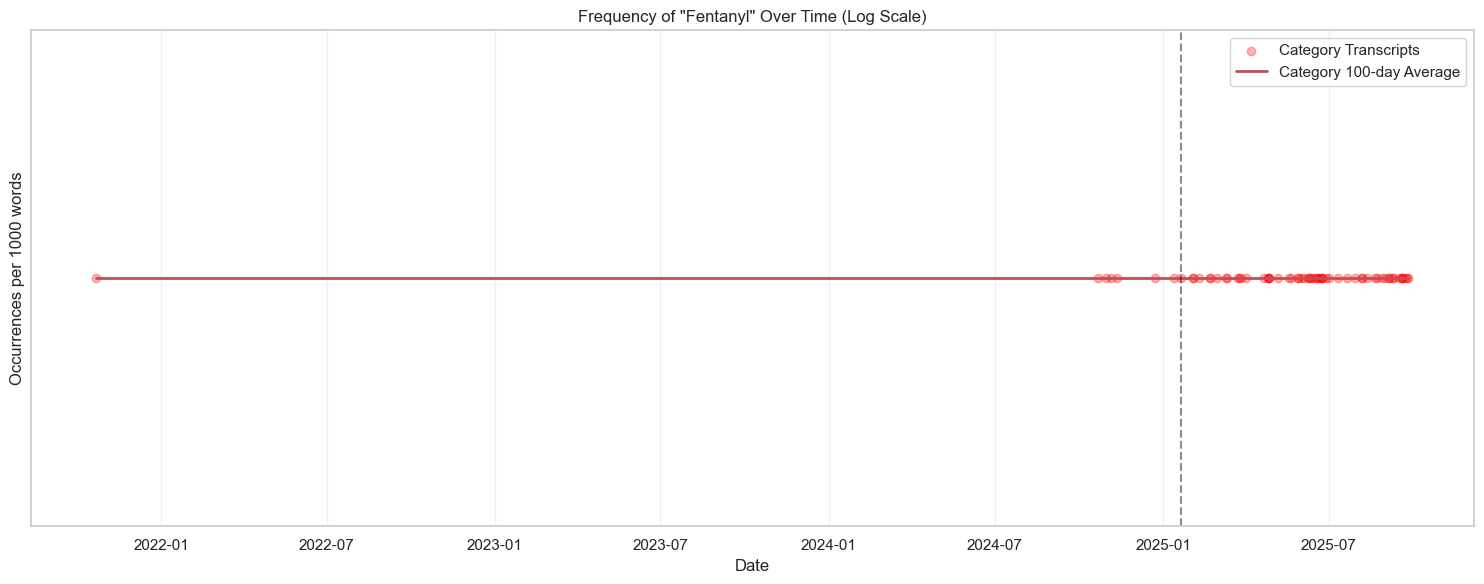


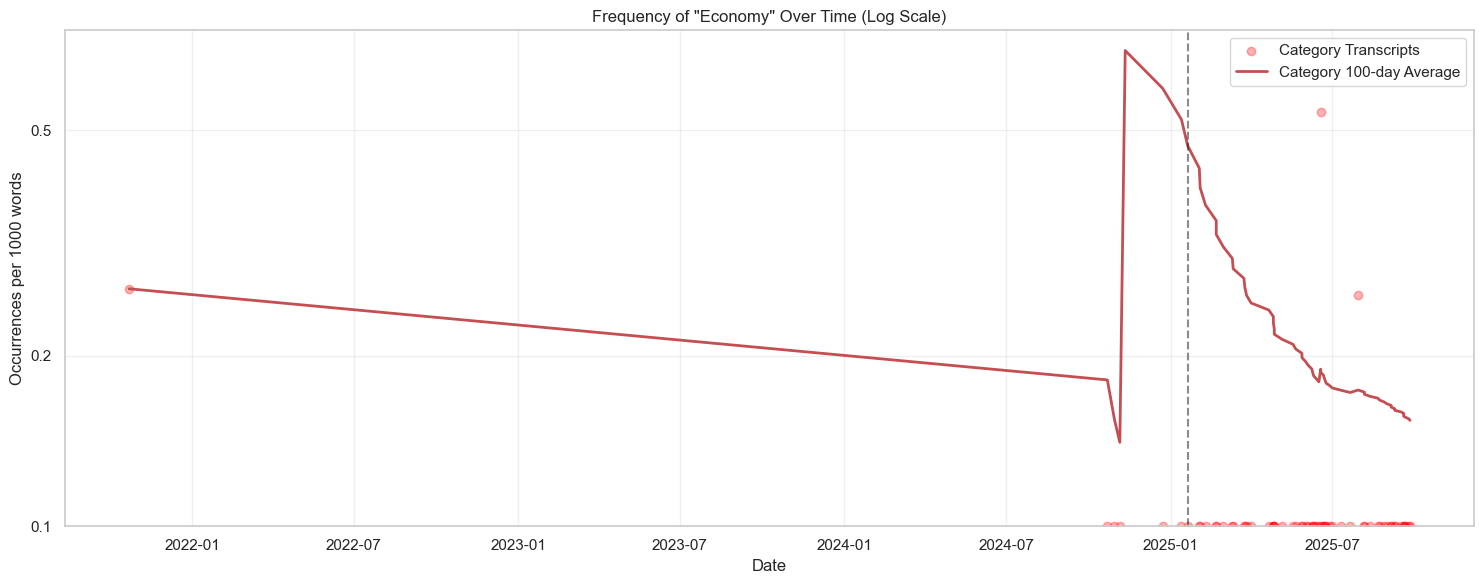


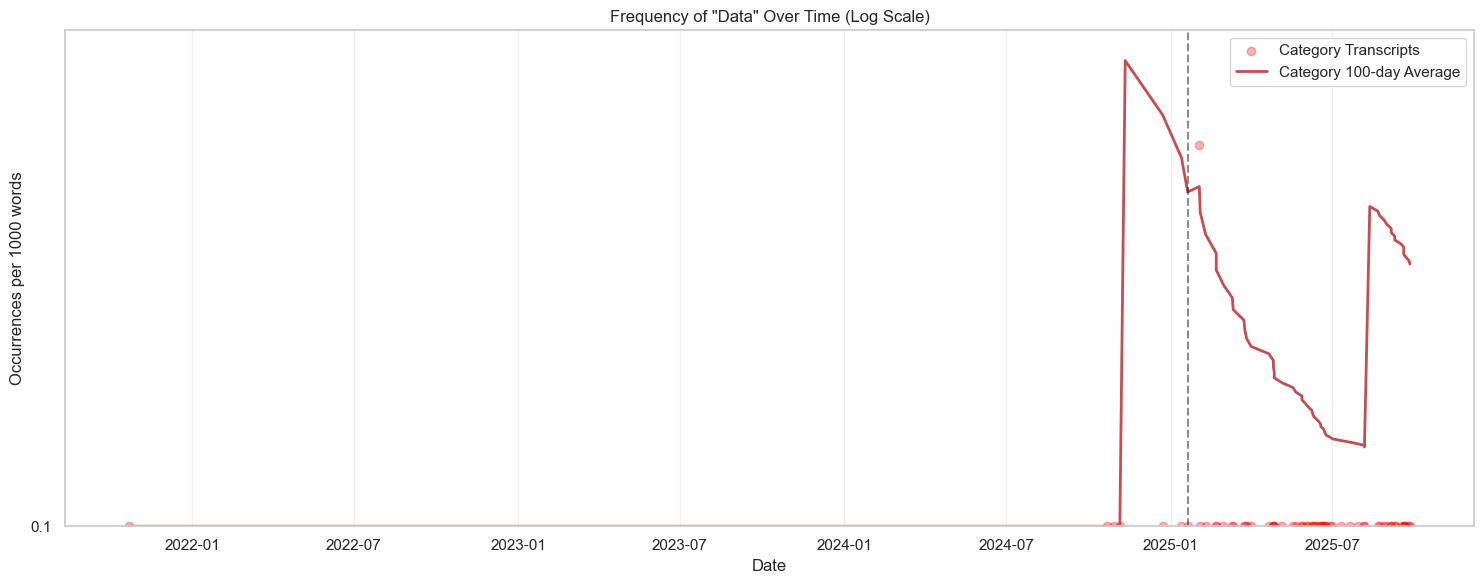


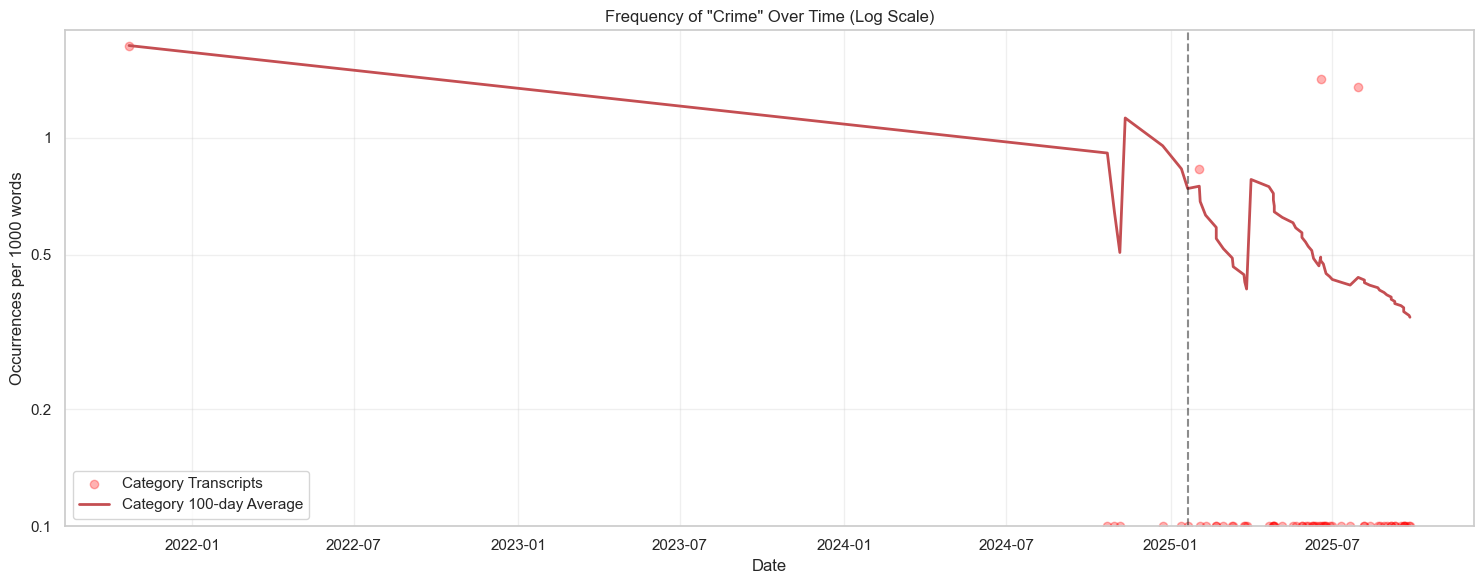


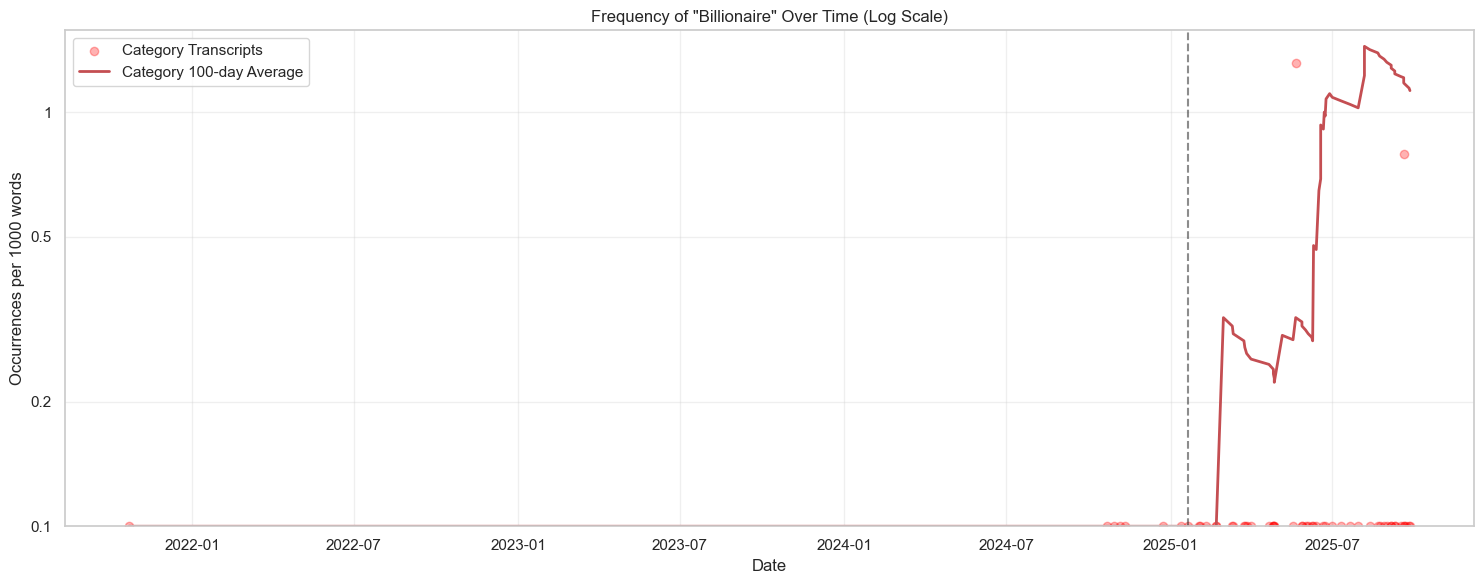

In [18]:
plot_phrase_frequency_over_time_all(df, phrases=SEARCH_PHRASES, log_scale=True, window=100)

In [27]:
analyze_files_phrase_occurrences(df[df['file'].str.contains('Victory Speech|Debate')], SEARCH_PHRASES)


Found 3 matching files:

  2021-10-22_2021 NYC General Election Mayoral Debate.txt
  2025-06-18_NYC 2025 1st Mayoral Debate June 4, 2025.txt
  2025-06-28_Victory Speech.txt


Phrase occurrences across selected files (sorted by total occurrences):


/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phrase_rows['Total'] = phrase_rows[sort_columns].sum(axis=1)


,2021-10-22_2021 NYC General Election Mayoral Debate.txt,"2025-06-18_NYC 2025 1st Mayoral Debate June 4, 2025.txt",2025-06-28_Victory Speech.txt,Average
Word Count,6157,2282,838,3092.333333
Trump,0,17,2,6.333333
Crime,10,3,0,4.333333
Subway,6,2,0,2.666667
Billionaire,0,5,2,2.333333
Funding,1,5,0,2.000000
Rent,1,4,1,2.000000
Job,5,0,0,1.666667
Rikers,4,0,0,1.333333
Homeless,2,1,0,1.000000



Summary:
Total files processed: 3
Total word count: 9,277


Expected length from category data: 781 words


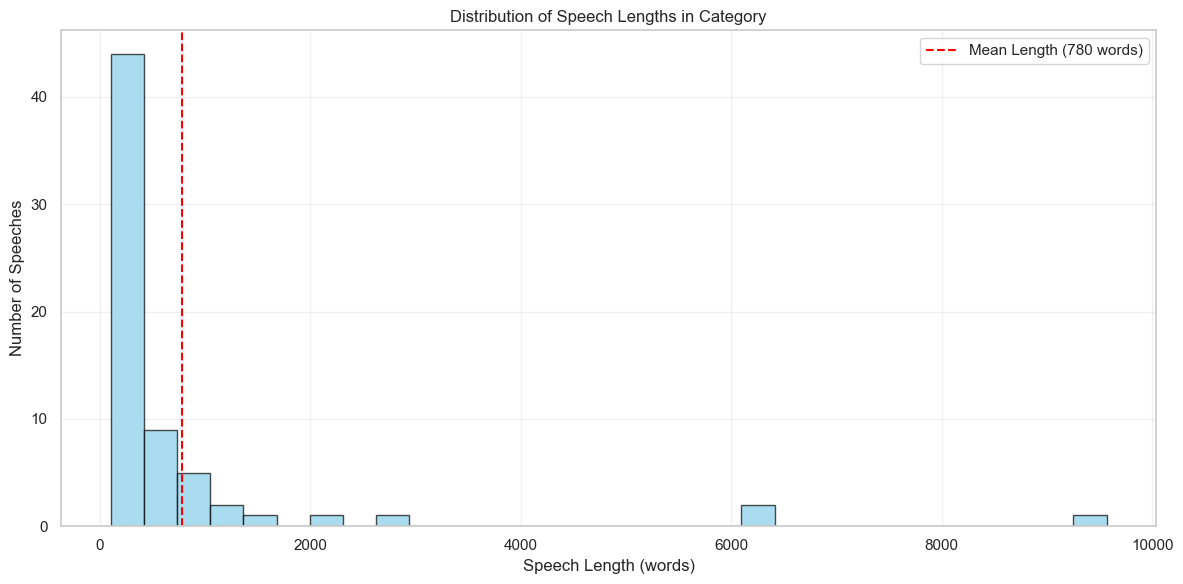

In [20]:
plot_length_distribution(df)

In [21]:
length = 2000

## Poisson Predictions

The most naive approach is to use the past frequency of a phrase over a given time period to forecast the probability of a phrase occurring during the expected length of a future speech. Using the Poisson distribution, we assume each word is independent and identically distributed. This allows us to compute threshold probabilities for a phrase occurring a given number of times, which can be compared to the prediction market's implied probability. However, this approach does not account for the clear dependence between words in a speech. This approach can still be useful for analyzing mentions where mostly independent occurrences might be expected (America, God, etc.) 

In [22]:
# Calculate predictions from different data sources
print("using length: ", length)
predictions_all = calculate_poisson_predictions(df, length, SEARCH_PHRASES)

print("Predictions based on all appearances:")
display(format_prediction_table(predictions_all))

predictions_recent = calculate_poisson_predictions(df_recent, length, SEARCH_PHRASES)

print("Predictions based on recent appearances:")
display(format_prediction_table(predictions_recent))


using length:  2000
Predictions based on all appearances:


,Phrase,Expected,Historical Rate,Total Historical,P(≥1)
15,Rent,2.68,1.339,69,93.1%
13,Trump,2.10,1.048,54,87.7%
17,Job,1.40,0.698,36,75.3%
25,Crime,1.36,0.679,35,74.3%
26,Billionaire,1.16,0.582,30,68.8%
14,Subway,1.01,0.504,26,63.5%
21,Funding,0.58,0.291,15,44.1%
6,Grocery,0.54,0.272,14,41.9%
23,Economy,0.27,0.136,7,23.8%
9,Corrupt / Corruption,0.23,0.116,6,20.8%


Predictions based on recent appearances:


,Phrase,Expected,Historical Rate,Total Historical,P(≥1)
17,Job,1.86,0.931,7,84.5%
0,Socialist / Socialism,0.80,0.399,3,55.0%
21,Funding,0.53,0.266,2,41.3%
13,Trump,0.53,0.266,2,41.3%
26,Billionaire,0.53,0.266,2,41.3%
9,Corrupt / Corruption,0.27,0.133,1,23.4%
14,Subway,0.27,0.133,1,23.4%
3,Luigi / Mangione,0.00,0.000,0,0.0%
25,Crime,0.00,0.000,0,0.0%
24,Data,0.00,0.000,0,0.0%


## Negative Binomial 

A more general model that accounts for overdispersion. The dispersion parameter r is estimated using the method of moments, and it controls how much extra variance there is compared to a Poisson distribution. As r approaches infinity, the negative binomial converges to a Poisson distribution (in practice we use r=100 to approximate this). Values closer to 0 indicate that the data is overdispersed.

In [23]:
print("using length: ", length)

print("Negative Binomial Predictions based on all appearances:")
nb_predictions = calculate_negative_binomial_predictions(df, length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions))

print("Negative Binomial Predictions based on recent appearances:")
nb_predictions_recent = calculate_negative_binomial_predictions(df_recent, length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions_recent))


using length:  2000
Negative Binomial Predictions based on all appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
15,Rent,2.68,0.10,112.83,28.3%,0.177
13,Trump,2.10,0.10,52.64,26.6%,0.159
17,Job,1.40,0.17,12.62,31.8%,0.157
25,Crime,1.36,0.57,4.60,50.0%,0.189
26,Billionaire,1.16,0.10,28.36,22.4%,0.116
14,Subway,1.01,0.18,6.67,28.8%,0.125
21,Funding,0.58,1.85,0.77,39.7%,0.039
6,Grocery,0.54,0.10,5.37,17.0%,0.067
23,Economy,0.27,0.35,0.48,18.2%,0.020
9,Corrupt / Corruption,0.23,0.10,2.83,11.3%,0.027


Negative Binomial Predictions based on recent appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
17,Job,1.86,0.81,6.16,61.9%,0.270
0,Socialist / Socialism,0.80,0.12,6.18,21.5%,0.095
21,Funding,0.53,100.00,0.38,41.2%,0.017
13,Trump,0.53,0.10,7.42,16.8%,0.066
26,Billionaire,0.53,100.00,0.15,41.2%,0.017
9,Corrupt / Corruption,0.27,0.10,1.35,12.2%,0.032
14,Subway,0.27,0.10,1.32,12.2%,0.032
3,Luigi / Mangione,0.00,100.00,0.00,0.0%,0.000
25,Crime,0.00,100.00,0.00,0.0%,0.000
24,Data,0.00,100.00,0.00,0.0%,0.000


## Recent Usage in context

In [24]:
get_recent_contexts_all(df, SEARCH_PHRASES, n=10)


=== Recent usage of 'Socialist / Socialism' ===

Date: 2025-09-19 (transcripts)
Context: ... presidential candidate, but you were also a mayor for eight years. Eight years. Four terms. Ronald Reagan had just won the presidency. He had even won Vermont. And yet there you were as a Democratic socialist deciding to run for mayor. What made you make that decision? I think Reagan was part of it. We had come off of the war in Vietnam some years before. Serious economic problems. The needs of working-cl...

Date: 2025-09-19 (transcripts)
Context: ...r eight years. Four terms. >> Eight years. Four terms. And the time when you decided to run, Ronald Reagan had just won the presidency. He had even won Vermont. And yet there you were as a Democratic socialist deciding to run for mayor. What made you make that decision? >> I think Reagan was part of it during that period. This is ancient history. You know, we were dealing with serious economic problems. We...

Date: 2025-09-09 (transcripts)
Conte

## Per-Speech Frequencies


In [25]:
len(df_recent)

13

In [26]:
get_per_appearance_frequency({'all': df, 'over 1000 words': df[df['text_length'] > 1000], 'recent': df_recent, 'recent over 1000 words': df_recent[df_recent['text_length'] > 1000]}, SEARCH_PHRASES)


Percentage of Appearances Containing Each Phrase:


,all,over 1000 words,recent,recent over 1000 words
# of files,66.000000,8.0,13.000000,1.0
Average word count,780.969697,3882.0,578.153846,2880.0
Rent,36.363636,62.5,0.000000,0.0
Trump,22.727273,37.5,15.384615,0.0
Job,22.727273,75.0,30.769231,100.0
Billionaire,19.696970,25.0,7.692308,100.0
Subway,15.151515,50.0,7.692308,0.0
Grocery,13.636364,25.0,0.000000,0.0
Funding,10.606061,62.5,15.384615,100.0
Crime,9.090909,62.5,0.000000,0.0
